# Artistic Image Filters using OpenCV

<p>This notebook will demostrate various image manipulation techniques using OpenCV to mimic popular photoshop or instagram filters. In this notebook we will experiment with a wide range of filters, many of which produce artistic renderings of the original image. As you will see in the notebook, many of these effects require some experimentation, and the results for a given filter can vary quite a bit depending on the particular image used.
</p>

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### <font style='color:rgb(50,120,230)'>Load sample images</font>

In [19]:
flower = cv2.imread('/home/sp/Documents/OpenCV AI Course/OpenCV For Beginners/Module 8 - Image Filtering and Enhancement/module08-Image-Filtering/Applications/visuals/flowers.jpg')
house = cv2.imread('/home/sp/Documents/OpenCV AI Course/OpenCV For Beginners/Module 8 - Image Filtering and Enhancement/module08-Image-Filtering/Applications/visuals/house.jpg')
monument = cv2.imread('/home/sp/Documents/OpenCV AI Course/OpenCV For Beginners/Module 8 - Image Filtering and Enhancement/module08-Image-Filtering/Applications/visuals/monument.jpg')
city = cv2.imread('/home/sp/Documents/OpenCV AI Course/OpenCV For Beginners/Module 8 - Image Filtering and Enhancement/module08-Image-Filtering/Applications/visuals/new-york.jpg')
santorini = cv2.imread('/home/sp/Documents/OpenCV AI Course/OpenCV For Beginners/Module 8 - Image Filtering and Enhancement/module08-Image-Filtering/Applications/visuals/santorini.jpg')
coast = cv2.imread('/home/sp/Documents/OpenCV AI Course/OpenCV For Beginners/Module 8 - Image Filtering and Enhancement/module08-Image-Filtering/Applications/visuals/california-coast.jpg')

### <font style='color:rgb(50,120,230)'>Function to display original and filtered images</font>

In [43]:
def plot(img1, img2):
    
    fig = plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Filtered Image")

    plt.show()

# 1. Black & White Filter

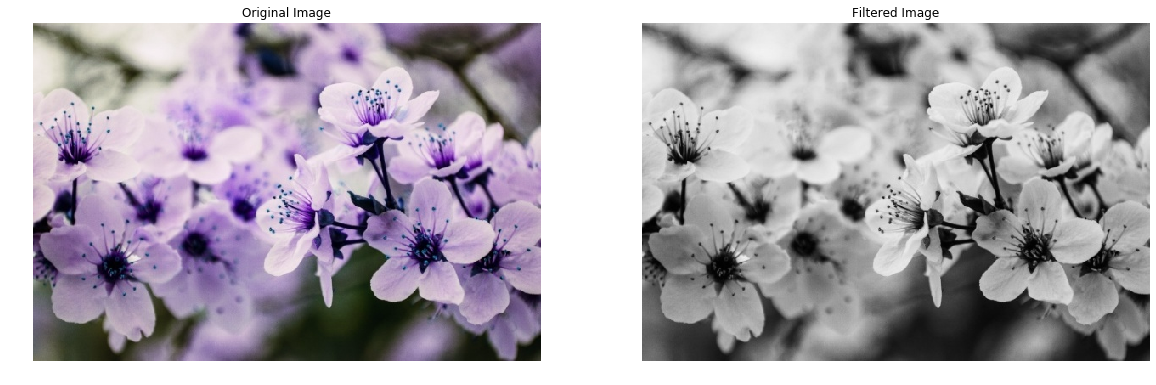

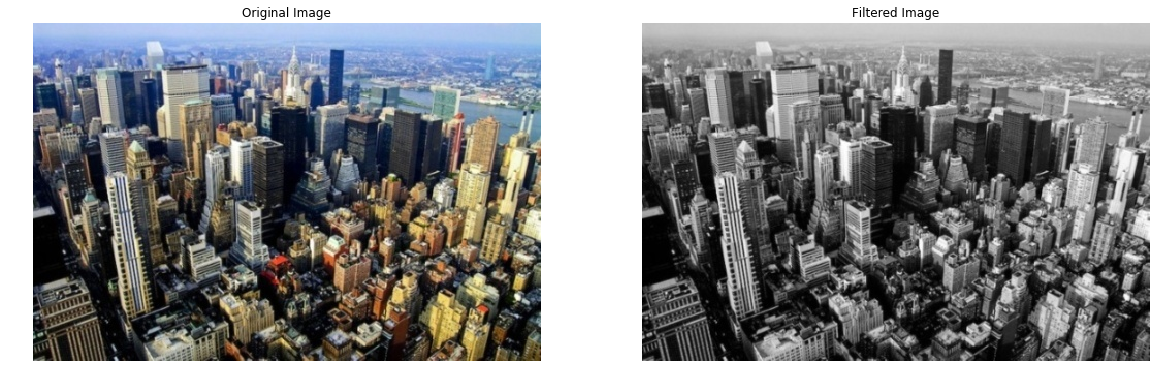

In [47]:
flower_gray = cv2.cvtColor(flower,cv2.COLOR_BGR2GRAY)
city_gray = cv2.cvtColor(city,cv2.COLOR_BGR2GRAY)
plot(flower,flower_gray)
plot(city,city_gray)

# 2. Sepia / Vintage Filter

## Matrix Transformation

<b>transform()</b> performs the matrix transformation on every array element

In [64]:
def sepia(img):
    img_sepia = img.copy()
    # Converting to RGB as sepia matrix below is for RGB
    img_sepia = cv2.cvtColor(img_sepia,cv2.COLOR_BGR2RGB)
    img_sepia = img_sepia.astype('float64')
    img_sepia = cv2.transform(img_sepia, np.matrix([
        [0.393, 0.769, 0.189],[0.349, 0.686, 0.168],[0.272, 0.534, 0.131]
    ]))
    # Clip values to the range [0,255]
    img_sepia = np.clip(img_sepia, 0, 255)
    img_sepia = img_sepia.astype('uint8')
    img_sepia = cv2.cvtColor(img_sepia,cv2.COLOR_RGB2BGR)
    return img_sepia

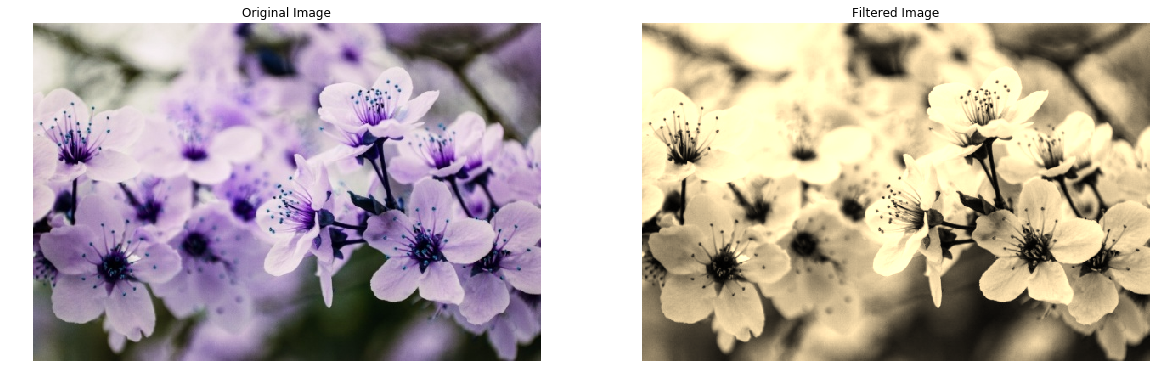

In [65]:
img = flower
img_sepia = sepia(img)
plot(img,img_sepia)

# 3. Vignette Effect 

<p>The vignette effect is achieved by creating a broad 2D Gaussian Kernel</p>

In [66]:
def vignette(img, level=2):
    height, width = img.shape[:2]
    # Generate vignette mask using Gaussian Kernel.
    X_resultant_kernel = cv2.getGaussianKernel(width,width/level)
    Y_resultant_kernel = cv2.getGaussianKernel(height,height/level)
    # Generating resultant_kernel matrix.
    kernel = Y_resultant_kernel * X_resultant_kernel.T
    mask = kernel / kernel.max()
    img_vignette = img.copy()
    # Applying the mask to each channel in the input image
    for i in range(3):
        img_vignette[:,:,i] = img_vignette[:,:,i] * mask
    return img_vignette

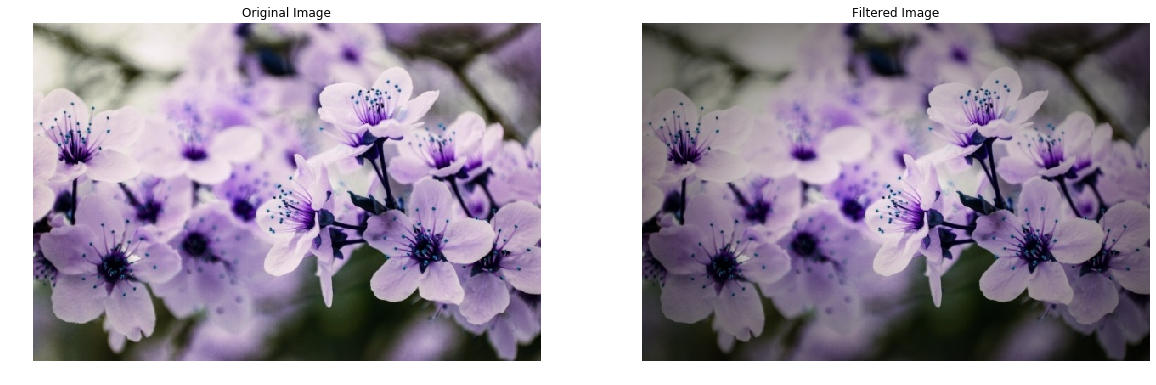

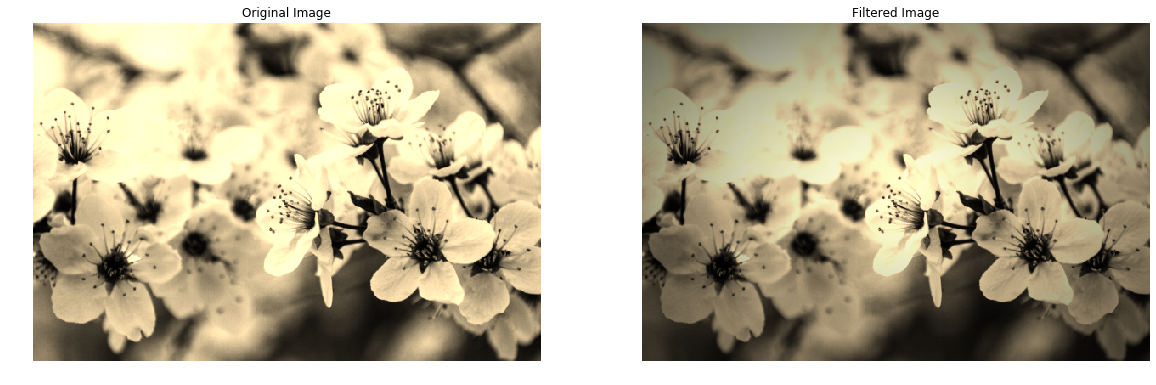

In [70]:
img = flower
vignette_img = vignette(img)
sepia_vignette = vignette(img_sepia)
plot(img,vignette_img)
plot(img_sepia,sepia_vignette)

# 4. Edge Detection Filter

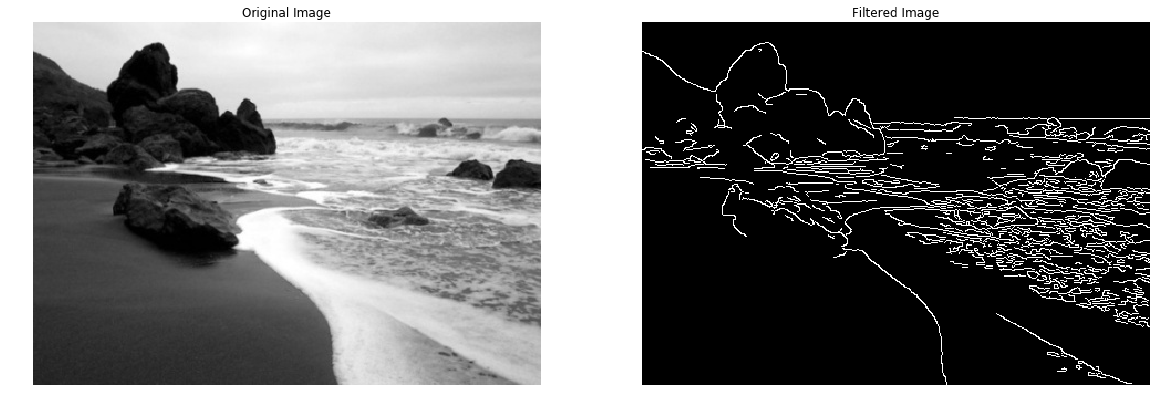

In [73]:
img = coast
img_edges = cv2.Canny(img, 100, 200)
plot(img, img_edges)

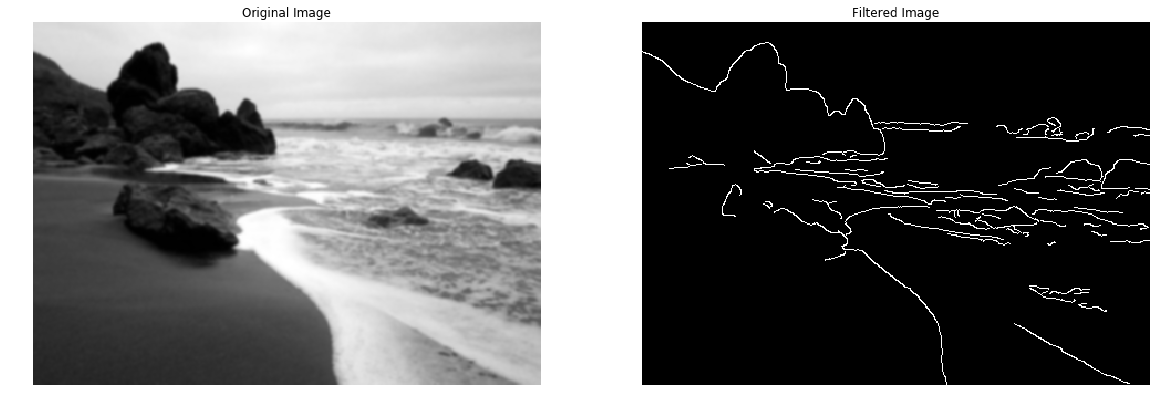

In [74]:
img = coast
img = cv2.GaussianBlur(img, (5,5),0)
img_edges = cv2.Canny(img, 100, 200)
plot(img, img_edges)

# 5. Embossed Edges

## Convolving Images with a Kernel
<p>filter2D() convolves an image with the kernel. The function applies an arbitrary linear filter to an image</p>

In [75]:
def embossed_edges(img):
    kernel = np.array([[0, -3, -3], 
                       [3,  0, -3], 
                       [3,  3,  0]])
    img_emboss = cv2.filter2D(img, ddepth=-1, kernel=kernel)
    return img_emboss

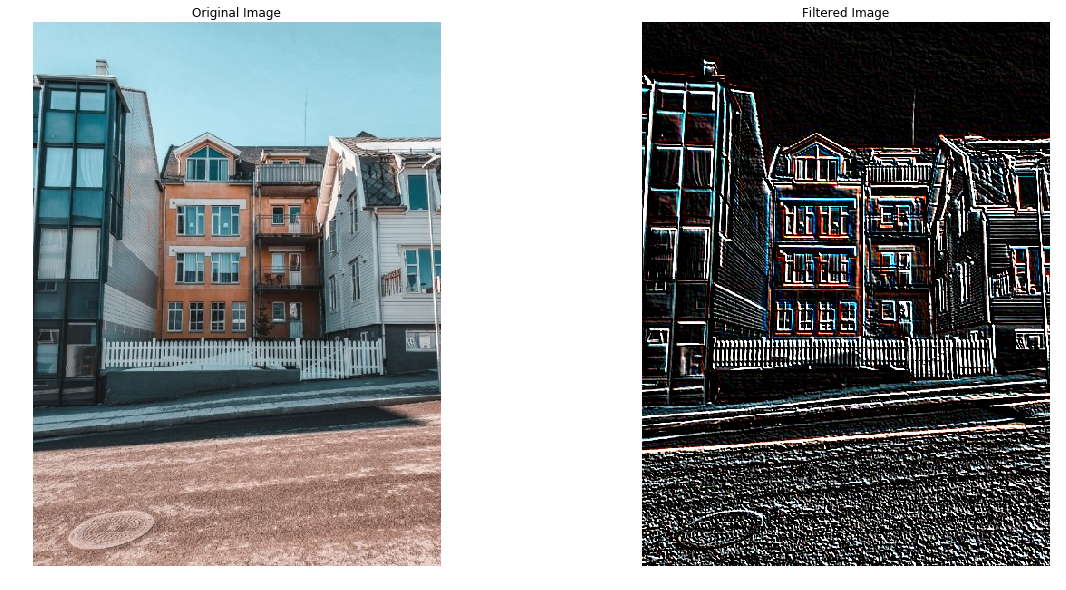

In [77]:
img = house
img_emboss = embossed_edges(img)
plot(img, img_emboss)

# 6. Improving Exposure

In [80]:
def bright(img,level):
    img_bright = cv2.convertScaleAbs(img, beta=level)
    return img_bright

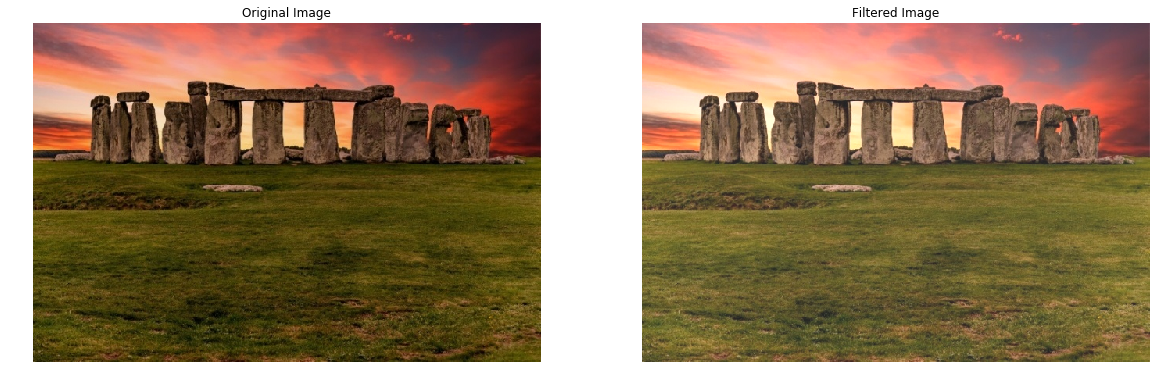

In [83]:
img = monument
img_bright = bright(img,35)
plot(img,img_bright)

# 7. Outline Filter

In [84]:
def outline(img, k = 9):
    
    k = max(k,9)
    kernel = np.array([[-1, -1, -1],
                       [-1,  k, -1],
                       [-1, -1, -1]])
    
    img_outline = cv2.filter2D(img, ddepth = -1, kernel = kernel)

    return img_outline

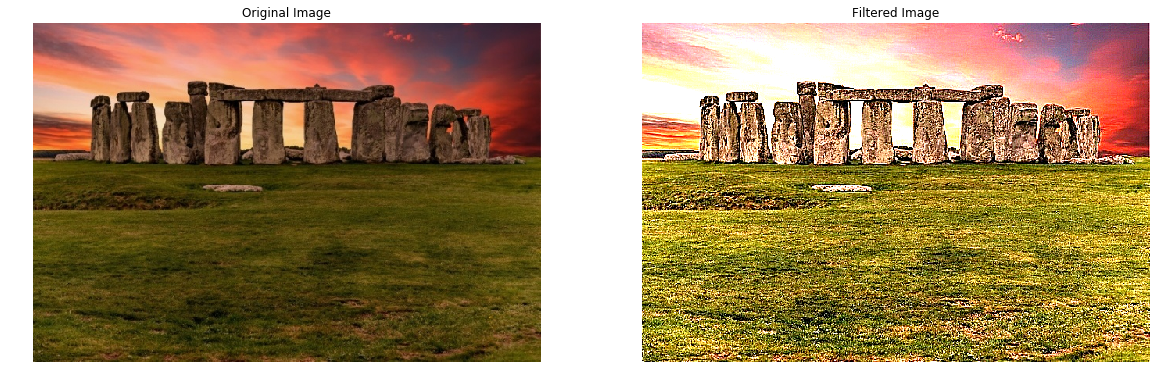

In [85]:
img = monument
img_outline = outline(img, k = 10)
plot(img, img_outline)

# 8. Pencil Sketch Filter

<p>pencilSketch() Created a pencil like non photorealistic line drawing</p>

<b>Gaussian Blurring is recommended preprocessing step before pencilSketch()</b>

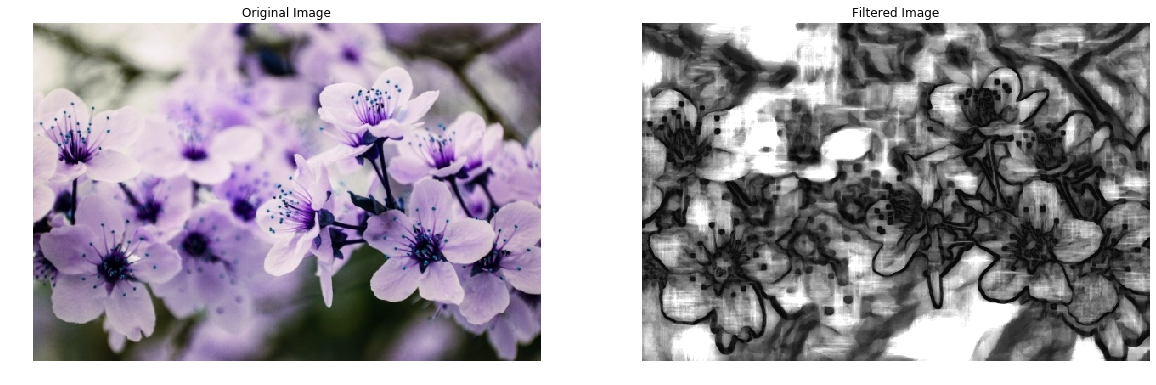

In [91]:
img = flower
img_blur = cv2.GaussianBlur(img,(5,5),0)
pencilsketch,_ = cv2.pencilSketch(img_blur)
plot(img,pencilsketch)

# 9. Stylization Filter

In [108]:
def stylization(img_styler):
    img_blurstyle = cv2.GaussianBlur(img_styler,(5,5),0)
    style_image = cv2.stylization(img_blurstyle)
    return style_image

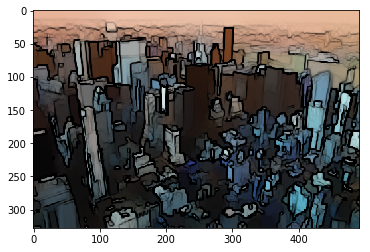

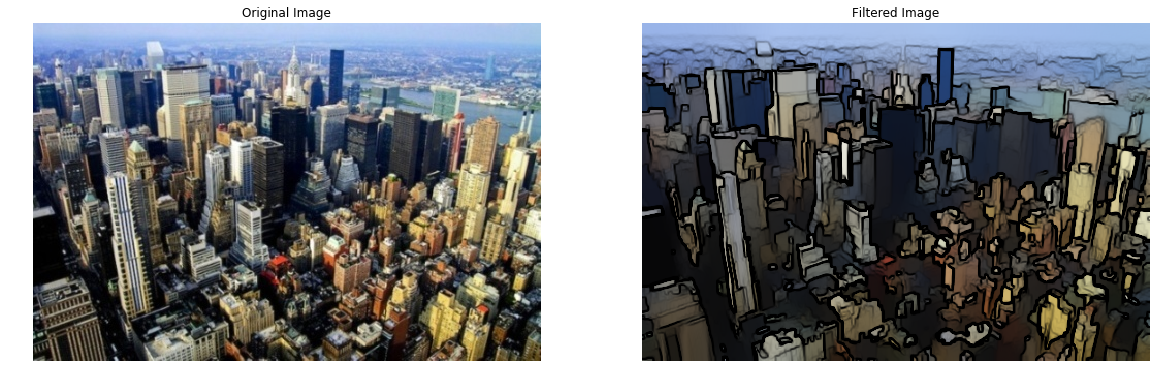

In [110]:
img_city = city
style_img = stylization(img_city)
plt.imshow(style_img)
plot(img_city, style_img)